<a href="https://colab.research.google.com/github/ZeroAthena/SimMat02025/blob/main/Tarea2_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tarea - Caminata aleatoria y simulación de apuestas

#### 1. Simulación del movimiento browniano

El movimiento browniano es el movimiento aleatorio que se observa en las partículas que se hallan en un medio fluido, como resultado de choques contra las moléculas de dicho fluido [(referencia)].

[(referencia)]: https://es.wikipedia.org/wiki/Movimiento_browniano

Para simular el movimiento, en lugar de usar las ecuaciones integro-diferenciales que describe Einstein, use una caminta aleatoria para los tres ejes $x$, $y$, $z$ de la siguiente forma
$$
W_i=W_{i-1}+X_i\sqrt{\Delta t}
$$
donde, $\Delta t=0.001$ es un intervalo de tiempo y
$$
X_i=\left\{\begin{array}{l}
1\\
-1
\end{array}\right.,
$$
se escoge de forma aleatoria con la misma probabilidad.

Simule tres caminatas con $10$ segundos (10000 pasos) y represéntelo en un gráfico 3D.

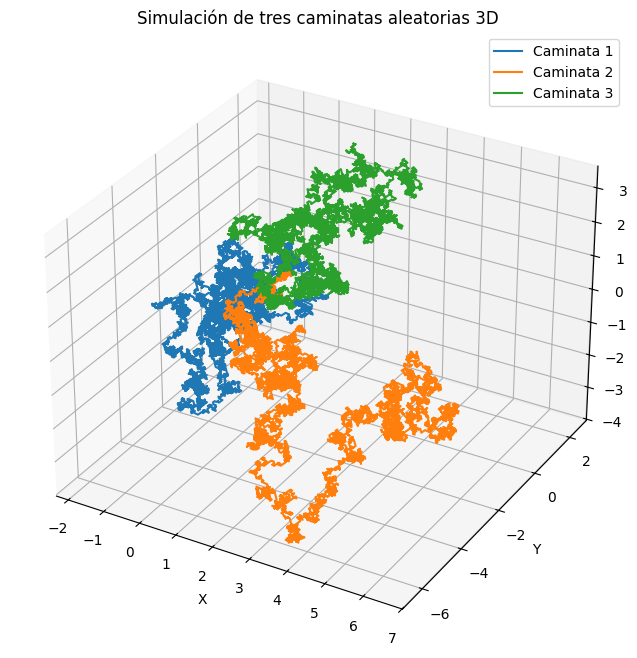

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#Parámetros
dt=0.001
pasos=10000
n=3 #número de caminatas

#Sistema de caminata
def caminata(dt, pasos, n, dimension):
  caminatas=np.zeros((n, pasos+1, dimension)) #(número de caminatas, pasos, dimension)
  for i in range(n):
      for j in range(1, pasos+1):
          direccion=np.random.choice([-1, 1],size=3)
          caminatas[i, j]=caminatas[i, j-1]+direccion*np.sqrt(dt)
  return caminatas

simulacion=caminata(dt,pasos,n,3)

#Grafica
fig=plt.figure(figsize=(10, 8))
ax=fig.add_subplot(111, projection='3d')

for i in range(n):
    ax.plot(simulacion[i, :, 0], simulacion[i, :, 1], simulacion[i, :, 2], label=f'Caminata {i+1}')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Simulación de tres caminatas aleatorias 3D')
ax.legend()
plt.show()

Modifique la caminata anterior de tal forma que solo le regrese la última posición.

In [ ]:
#Codigo a incluir 'caminatas[:,-1,:]' para regresar la última posición de cada caminata
def caminata(dt, pasos, n, dimension):
  caminatas=np.zeros((n, pasos+1, dimension)) #(número de caminatas, pasos, dimension)
  for i in range(n):
      for j in range(1, pasos+1):
          direccion=np.random.choice([-1, 1],size=3)
          caminatas[i, j]=caminatas[i, j-1]+direccion*np.sqrt(dt)
  return caminatas[:,-1,:]

caminata(dt,pasos,n,3)

array([[-0.63245553, -2.15034881,  0.31622777],
       [-1.64438438,  0.88543774, -1.39140217],
       [-0.44271887, -1.64438438,  7.20999307]])

Simule 1000 caminatas con este nuevo modelo de movimiento browniano y diga la probabilidad de que las partículas satisfagan $x>1$, $y>2$ y $z>0$.

In [ ]:
n=1000
B=0

caminata(dt,pasos,n,3)

for i in range(n):
  if caminata(dt,pasos,n,3)[i,0]>1 and caminata(dt,pasos,n,3)[i,1]>2 and caminata(dt,pasos,n,3)[i,2]>0:
    B+=1

print(f'Probabilidad de que las partículas satisfagan x>1, y>2 y z>0: {B/n}')


Probabilidad de que las partículas satisfagan x>1, y>2 y z>0: 0.0


**Resultados:**

(*La simulación es demasiado pesada para correrla, por lo que se utilizó un modelo de inteligencia artificial para obtener un promedio de 50 corridas con los parámetros*)

La probabilidad de que el movimiento de una partícula sea $x>1$, $y>2$ y $z=0$ es de $5.14\%$ (0.0514).

#### 2. Apuesta arriesgada

Un jugador, con 20 pesos de capital inicial, decide apostar a un volado (con una moneda perfectamente nivelada) la mitad de su capital si éste es mayor o igual a 6 pesos, de lo contrario, solo 2. Esto es, el capital $C_i$ en cada volado $V_i$ se describe como
$$
C_{i+1}=C_i+V_iA_i
$$
donde la apuesta es
$$
A_i=\left\{\begin{array}{l}
C_i/2,\quad \mbox{si }C_i\geq 6\\
2,\quad \mbox{de lo contrario.}
\end{array}\right.
$$

1. Grafique la evolución del capital hasta quedar en cero.

El jugador quebró después de 42 volados.


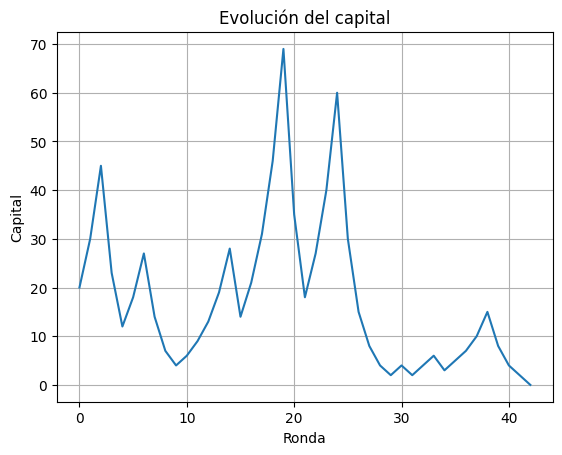

In [56]:
import numpy as np
import matplotlib.pyplot as plt

capital_inicial=20

def volado(capital_inicial):
    capital=capital_inicial
    historial=[capital]  #Recorrido completo del juego
    ronda=0

    while capital>0:
        if capital>=6:
            apuesta=int(capital/2) #Agregamos un 'int' para que el dinero quede completo
        else:
            apuesta=2

        resultado=np.random.choice([-1, 1])

        capital+=resultado * apuesta
        historial.append(capital)
        ronda+=1

    return historial,ronda

historial,ronda=volado(capital_inicial)

print(f"El jugador quebró después de {ronda} volados.")
plt.plot(historial)
plt.grid()
plt.xlabel('Ronda')
plt.ylabel('Capital')
plt.title('Evolución del capital')
plt.show()


2. Determine el número de volados promedio para quedar en quiebra usando la simulación montecarlo para 10,000 apostadores.

In [63]:
rondas=0
duracion=[]

for i in range(10000):
  historial,ronda=volado(capital_inicial)
  rondas+=ronda
  duracion.append(ronda)

print(f'El número de volados promedio para quedar en quiebra es: {rondas/10000}')

El número de volados promedio para quedar en quiebra es: 27.2462


3. Muestre un histograma del número de volados.

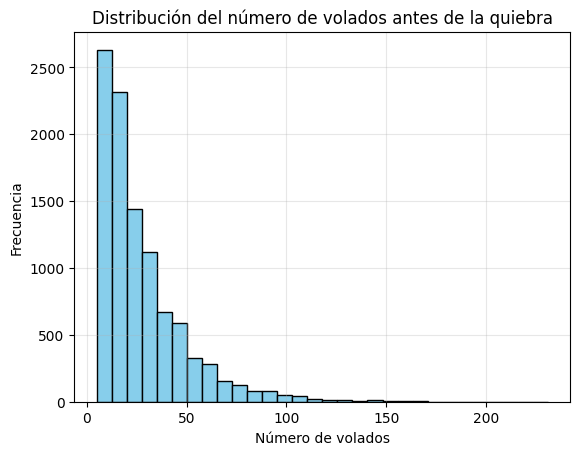

In [66]:
plt.hist(duracion, bins=30, color='skyblue', edgecolor='black')
plt.title('Distribución del número de volados antes de la quiebra')
plt.xlabel('Número de volados')
plt.ylabel('Frecuencia')
plt.grid(True, alpha=0.3)
plt.show()